Instructions: Have all the code for all the questions in one Jupyter notebook and upload the file at the time of submission. I will only consider this file format for grading. Run all the cells before uploading the file. So, after you uploaded the file, check the file extension and if it is not an ipynb, then upload the right file.

Consider population.csv file that is in the categorical_cols folder and answer the following:
1. Separate categorical columns from numerical columns. Apply OneHot encoding to categorical features.
2. Identify the numerical features that are normally distributed using K-Squared tests and apply standard scaler on the features that are normally distributed and min-max on the non-normal numerical features.
3. a) Then use preprocessor and makepipeline (or pipeline) to automatically apply the transformations and logistic regression and make prediction. Print confusion matrix, accuracy score and AUC.
b) a) Then use preprocessor and makepipeline (or pipeline) to automatically apply the transformations and Decision Tree and make prediction. Print confusion matrix, accuracy score and AUC.
Use the Markdown feature in the notebook to explain the steps and draw conclusion. Between logistic regression model and decision tree model which model is best?

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('population.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Job Type          32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Job Title         32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.head()

,Age,Job Type,Final Weight,Education,Education Number,Marital Status,Job Title,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
# Y is Income
dfy = df["Income"]
# Also drop Education since we have Education Number
df = df.drop(["Income", "Education"], axis=1)

In [8]:
categorical_features = ['Job Type', 'Marital Status', 'Job Title', 'Relationship', 'Race', 'Gender', 'Country']
for col in categorical_features:
    print(df[col].value_counts())
    print("\n")

Job Type
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Marital Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


Job Title
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


Relationship
Husband           13193
Not-

In [9]:
# Set the '?' to 'Other'
df["Job Type"] = df["Job Type"].str.replace("?", "Other")
df["Country"] = df["Country"].str.replace("?", "Other")
df["Job Title"] = df["Job Title"].str.replace("?", "Other")

for col in categorical_features:
    print(df[col].value_counts())
    print("\n")

Job Type
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Marital Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


Job Title
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Other                1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


Relationship
Husband           13193
Not-

### 1. Separate categorical columns from numerical columns. Apply OneHot encoding to categorical features.

In [11]:
# 1. Separate categorical and numeric
categorical_features

from sklearn.compose import make_column_selector as col_selector
int_cols_obj = col_selector(dtype_include="int64")
numeric_features = int_cols_obj(df)


### 2. Identify the numerical features that are normally distributed using K-Squared tests and apply standard scaler on the features that are normally distributed and min-max on the non-normal numerical features.

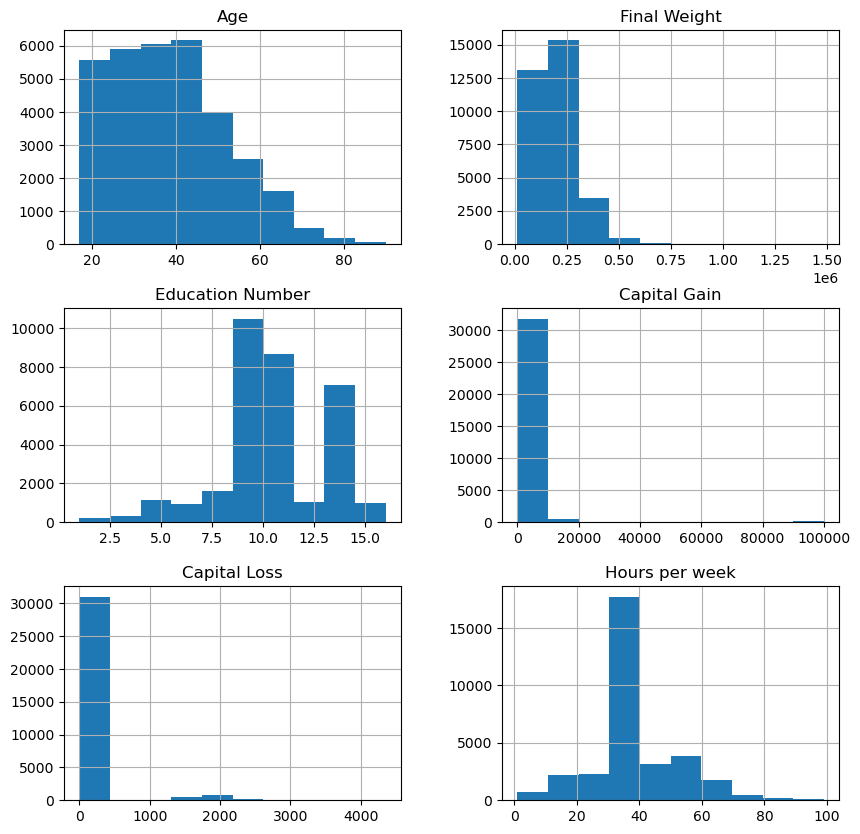

In [13]:
df_numeric = df[numeric_features].copy()
df_numeric.hist(figsize=(10,10))
plt.show()

In [14]:
# normality test
from scipy.stats import normaltest

def print_k2_test(col):
  print("\n", col, ":")
  k2_stat, k2_p_value = normaltest(df[col])
  k2_p_value = round(k2_p_value, 3)
  print('Statistics=%.3f, p=%.3f' % (k2_stat, k2_p_value))
  # interpret
  alpha = 0.05
  if k2_p_value > alpha:
      print('Sample looks Gaussian (fail to reject H0)')
  else:
      print('Sample does not look Gaussian (reject H0)')

for col in numeric_features:
    print_k2_test(col)


 Age :
Statistics=1526.011, p=0.000
Sample does not look Gaussian (reject H0)

 Final Weight :
Statistics=10662.514, p=0.000
Sample does not look Gaussian (reject H0)

 Education Number :
Statistics=817.164, p=0.000
Sample does not look Gaussian (reject H0)

 Capital Gain :
Statistics=55096.550, p=0.000
Sample does not look Gaussian (reject H0)

 Capital Loss :
Statistics=29331.400, p=0.000
Sample does not look Gaussian (reject H0)

 Hours per week :
Statistics=2508.918, p=0.000
Sample does not look Gaussian (reject H0)


<div class="alert alert-block alert-info">
<b>Conclusion:</b> None of the numeric features look Gaussian. Apply MinMax on all.
</div>

### 3a) Then use preprocessor and makepipeline (or pipeline) to automatically apply the transformations and logistic regression and make prediction. Print confusion matrix, accuracy score and AUC. 

model score: 0.845
Logistic AUC = 0.76
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4918
           1       0.72      0.60      0.66      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



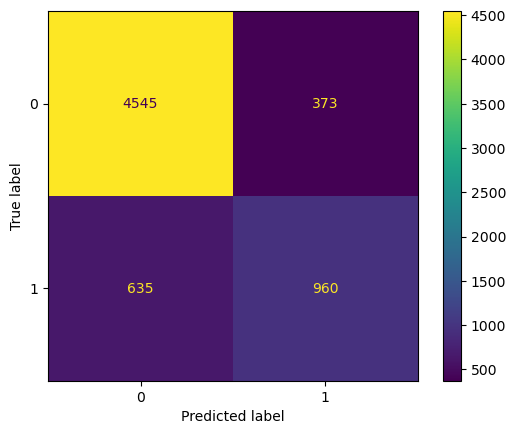

In [17]:
import numpy as np
from sklearn.compose import ColumnTransformer

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

np.random.seed(0)

# applying labelencoder only on the target feature
yb = preprocessing.LabelEncoder()
y = yb.fit_transform(dfy)

X = df

preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features),
               ('cat', OneHotEncoder(), categorical_features)])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf_make = clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

y_pred = clf_make.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, y_pred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### 3b) Then use preprocessor and makepipeline (or pipeline) to automatically apply the transformations and Decision Tree and make prediction. Print confusion matrix, accuracy score and AUC. Use the Markdown feature in the notebook to explain the steps and draw conclusion. Between logistic regression model and decision tree model which model is best?

model score: 0.812
Decision Tree AUC = 0.75
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4918
           1       0.61      0.62      0.62      1595

    accuracy                           0.81      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.81      0.81      0.81      6513



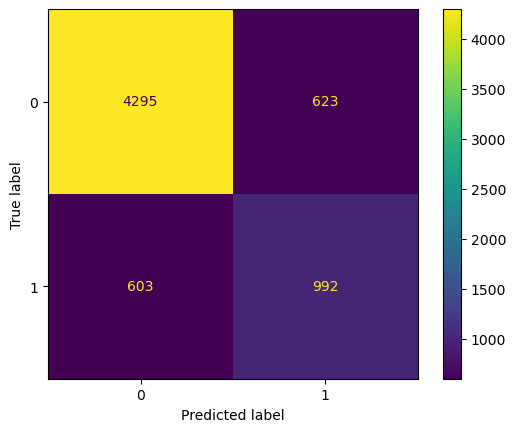

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = make_pipeline(preprocessor,  DecisionTreeClassifier(criterion="entropy"))
clf_make = clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

y_pred = clf_make.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, y_pred)
print("Decision Tree AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

<div class="alert alert-block alert-info">
<b>Conclusion:</b> Logistic Regression out performed decision tree. .85 vs .81 model score. AUC is .76 vs .75
</div>